In [107]:
import pandas as pd
import numpy as np
import missingno as msno

data = pd.read_csv('train.csv')
data = data.drop('Id', axis=1)
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [108]:
# Check for categorical variables
object_cols = data.select_dtypes(include='object').columns.tolist()
object_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [109]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with categorical data
for feature in object_cols:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

data.head(10)    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
5,50,3,85.0,14115,1,2,0,3,0,4,...,0,3,2,2,700,10,2009,8,4,143000
6,20,3,75.0,10084,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,307000
7,60,3,NaN,10382,1,2,0,3,0,0,...,0,3,4,2,350,11,2009,8,4,200000
8,50,4,51.0,6120,1,2,3,3,0,4,...,0,3,4,4,0,4,2008,8,0,129900
9,190,3,50.0,7420,1,2,3,3,0,0,...,0,3,4,4,0,1,2008,8,4,118000


<Axes: >

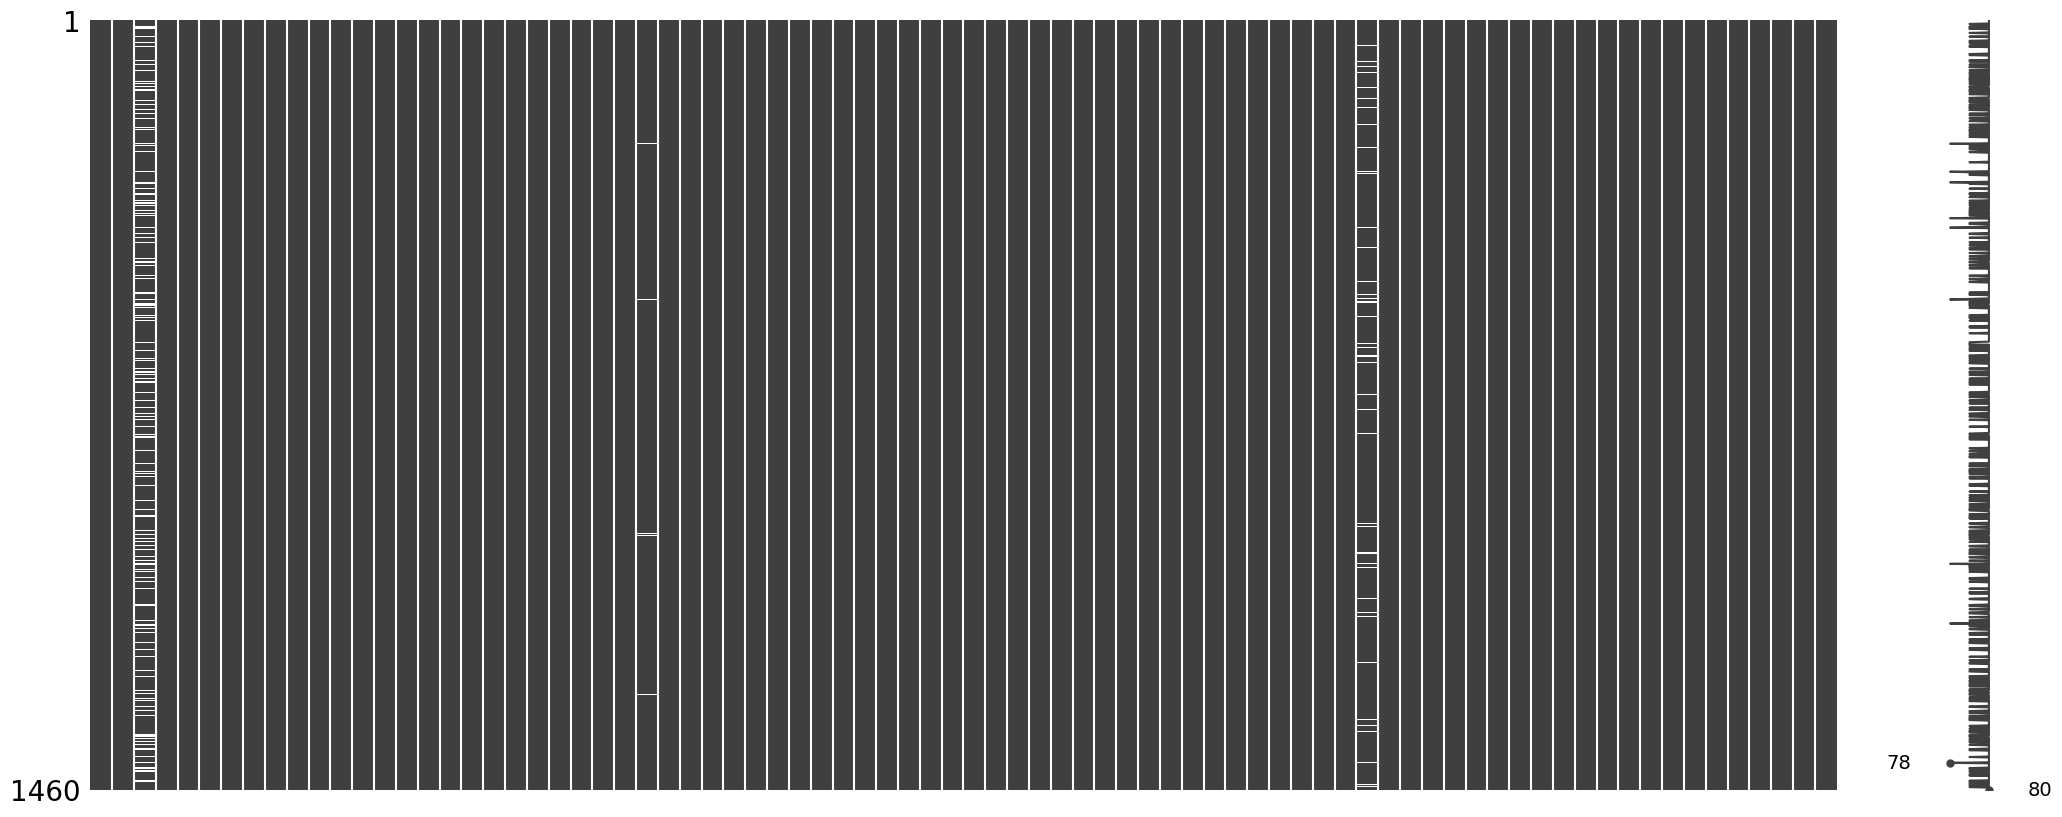

In [110]:
# Check for missing values
msno.matrix(data)

In [111]:
# Check for columns with missing values
nullCols = pd.DataFrame(data.isnull().sum()).sort_values(by=0, ascending=False)
nullCols

,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
MSSubClass,0
KitchenAbvGr,0
...,...
ExterCond,0
ExterQual,0
MasVnrType,0
Exterior2nd,0


In [112]:
# Fill missing values with median
for col in nullCols.index:
    if nullCols.loc[col][0] > 0:
        data[col]  = data[col].fillna(data[col].median())

<Axes: >

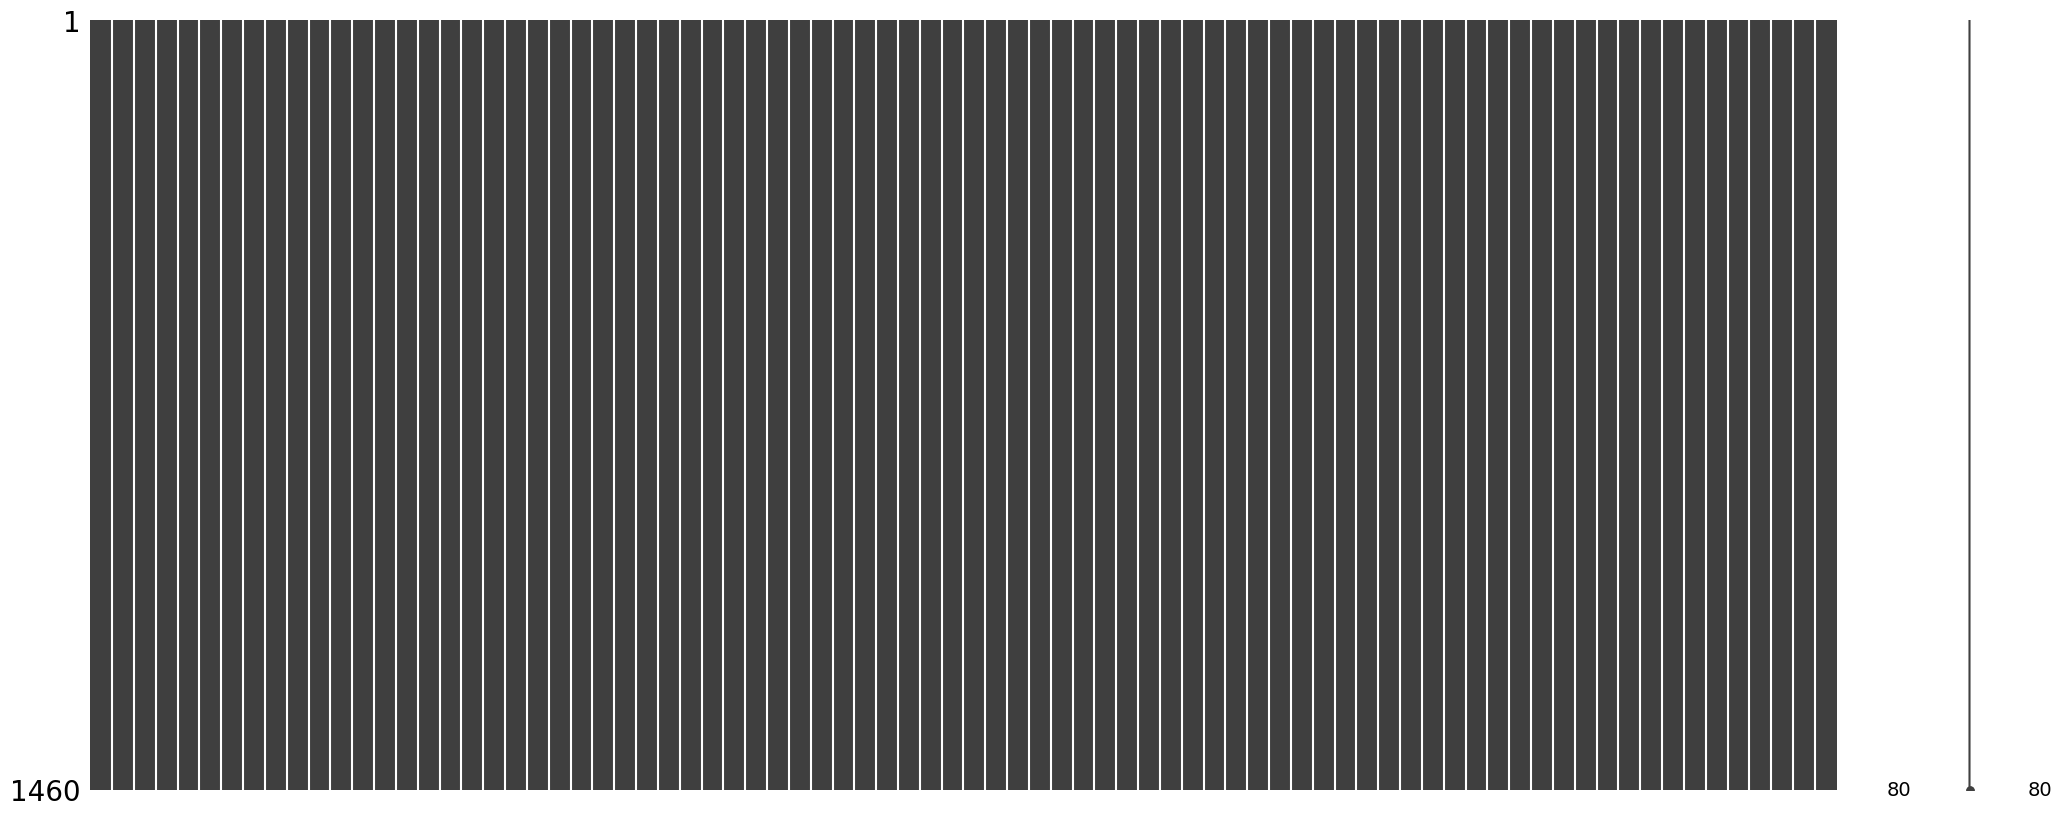

In [113]:
# Recheck for missing values
msno.matrix(data)

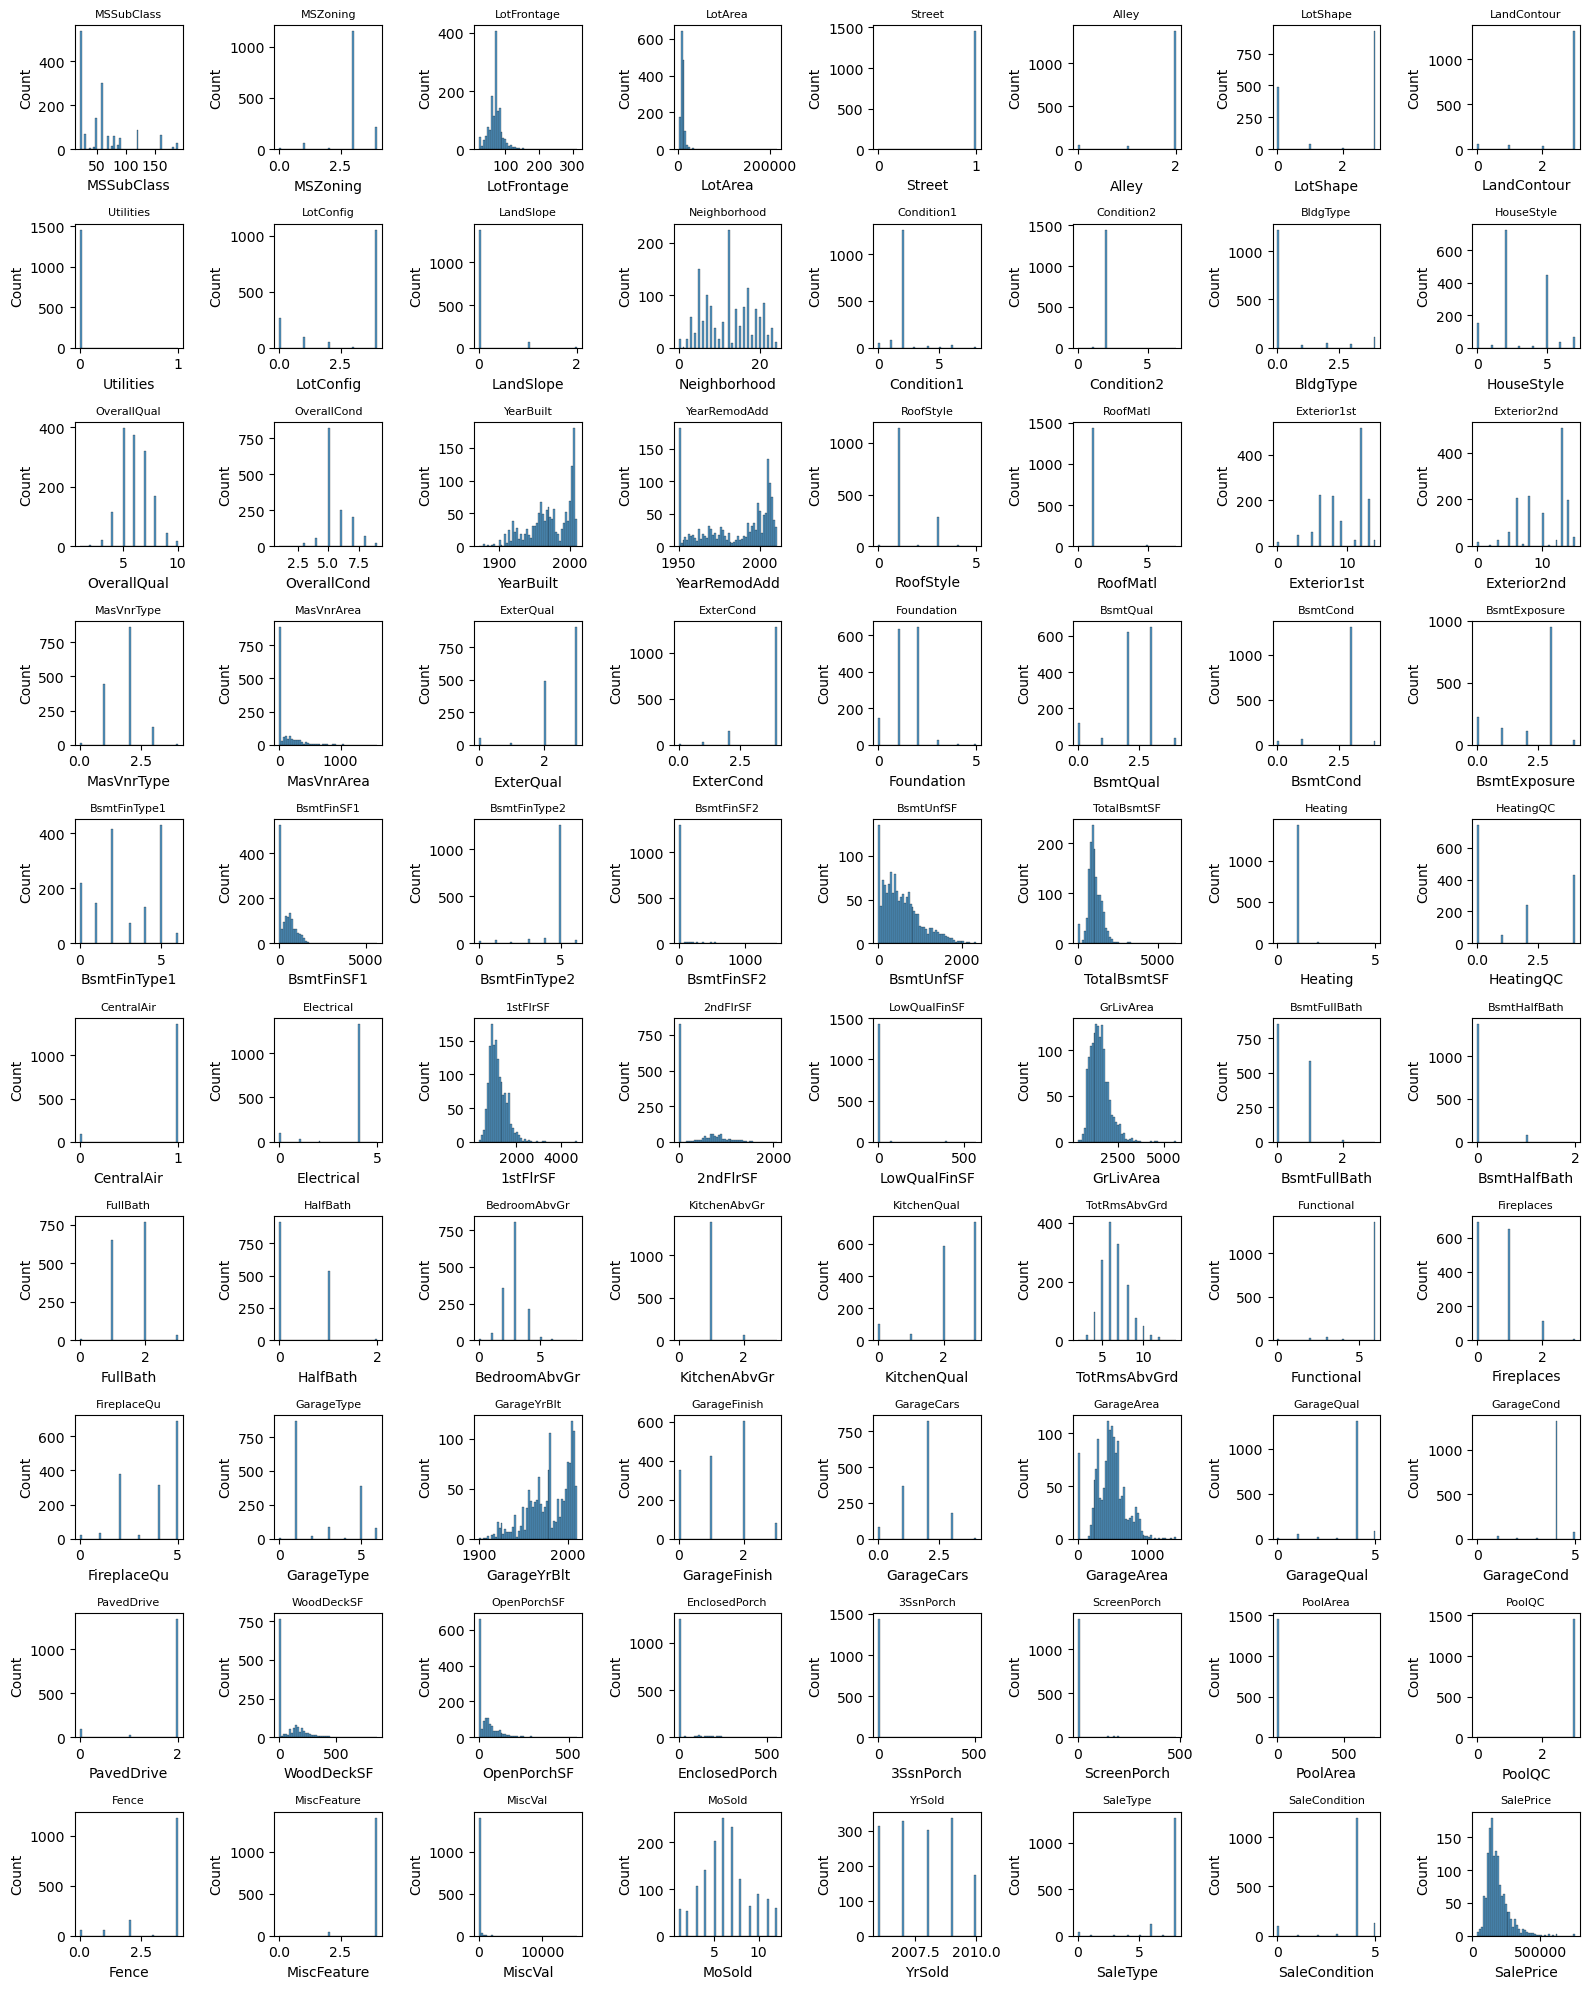

In [114]:
# Check for outliers (visualize using boxplots)
plt.figure(figsize=(16, 20))
for i, col in enumerate(data.columns):
    plt.subplot(10, 8, i+1)
    sns.histplot(data[col], kde=False, bins=50)
    plt.title(col, fontsize=8)

plt.tight_layout()
plt.show()

In [126]:
from sklearn.ensemble import IsolationForest

# Define a function to delete outliers
def remove_outliers_iqr(column):
    q1, q3 = column.quantile(0.25), column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column_copy = column.copy()
    column_copy[column < lower_bound] = column_copy.median()
    column_copy[column > upper_bound] = column_copy.median()
    return column_copy

# Remove outliers
data_clean = pd.DataFrame()
for col in data.columns:
    data_clean[col] = remove_outliers_iqr(data[col])

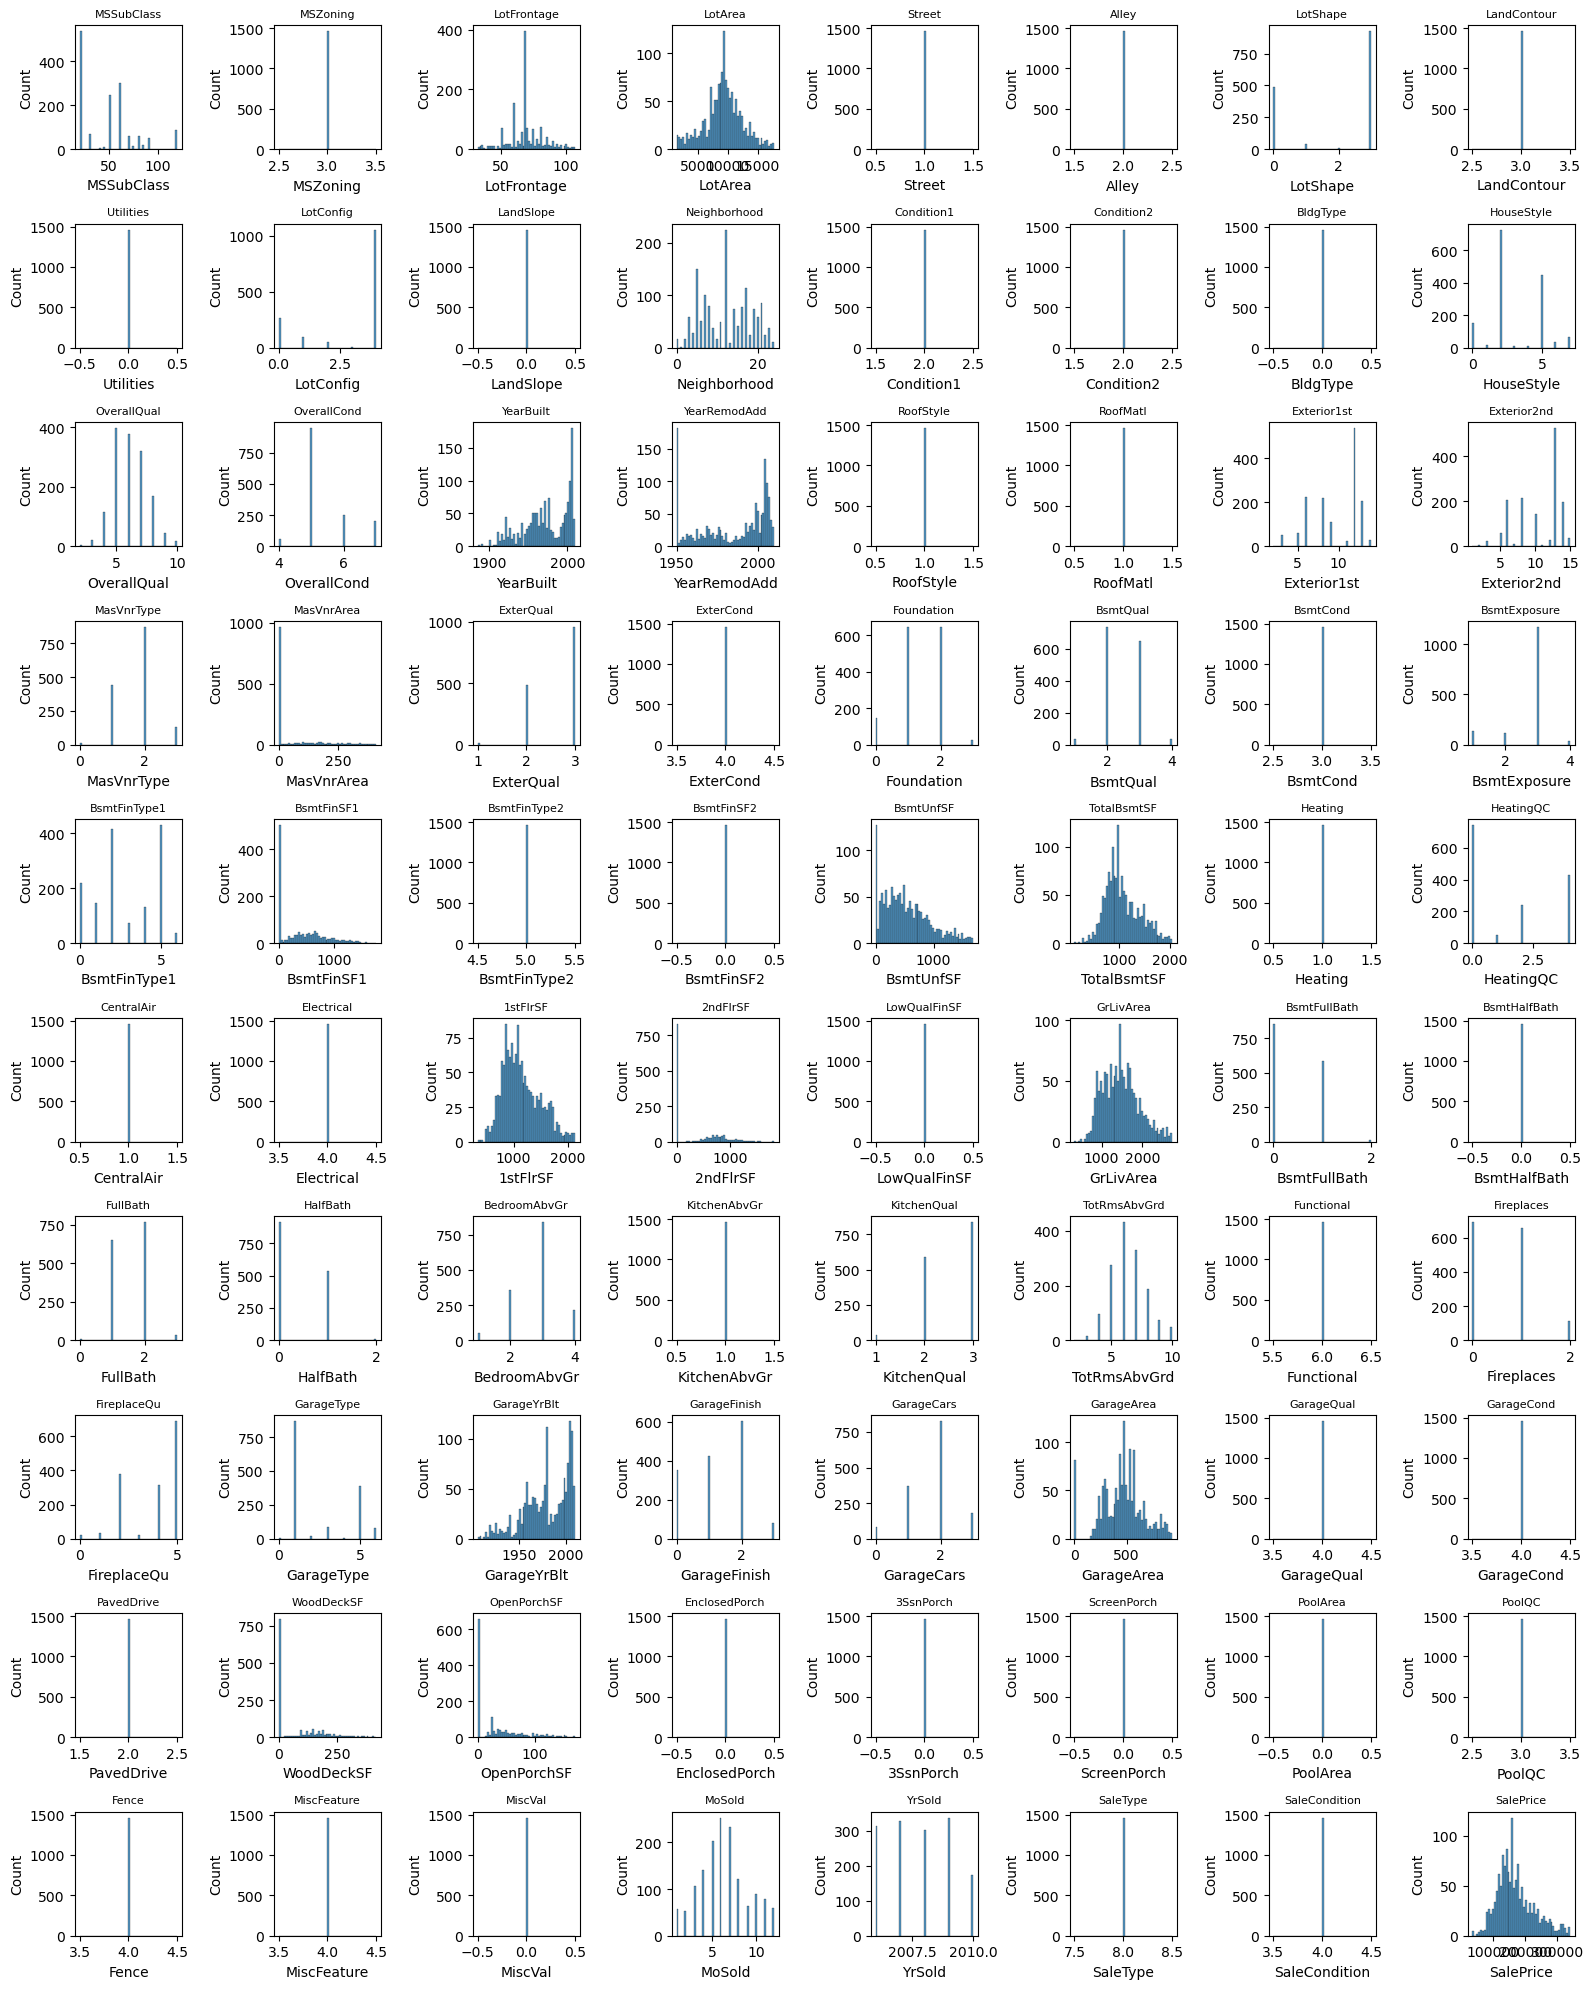

In [129]:
# Recheck for outliers
plt.figure(figsize=(16, 20))
for i, col in enumerate(data_clean.columns):
    plt.subplot(10, 8, i+1)
    sns.histplot(data_clean[col], kde=False, bins=50)
    plt.title(col, fontsize=8)

plt.tight_layout()
plt.show()

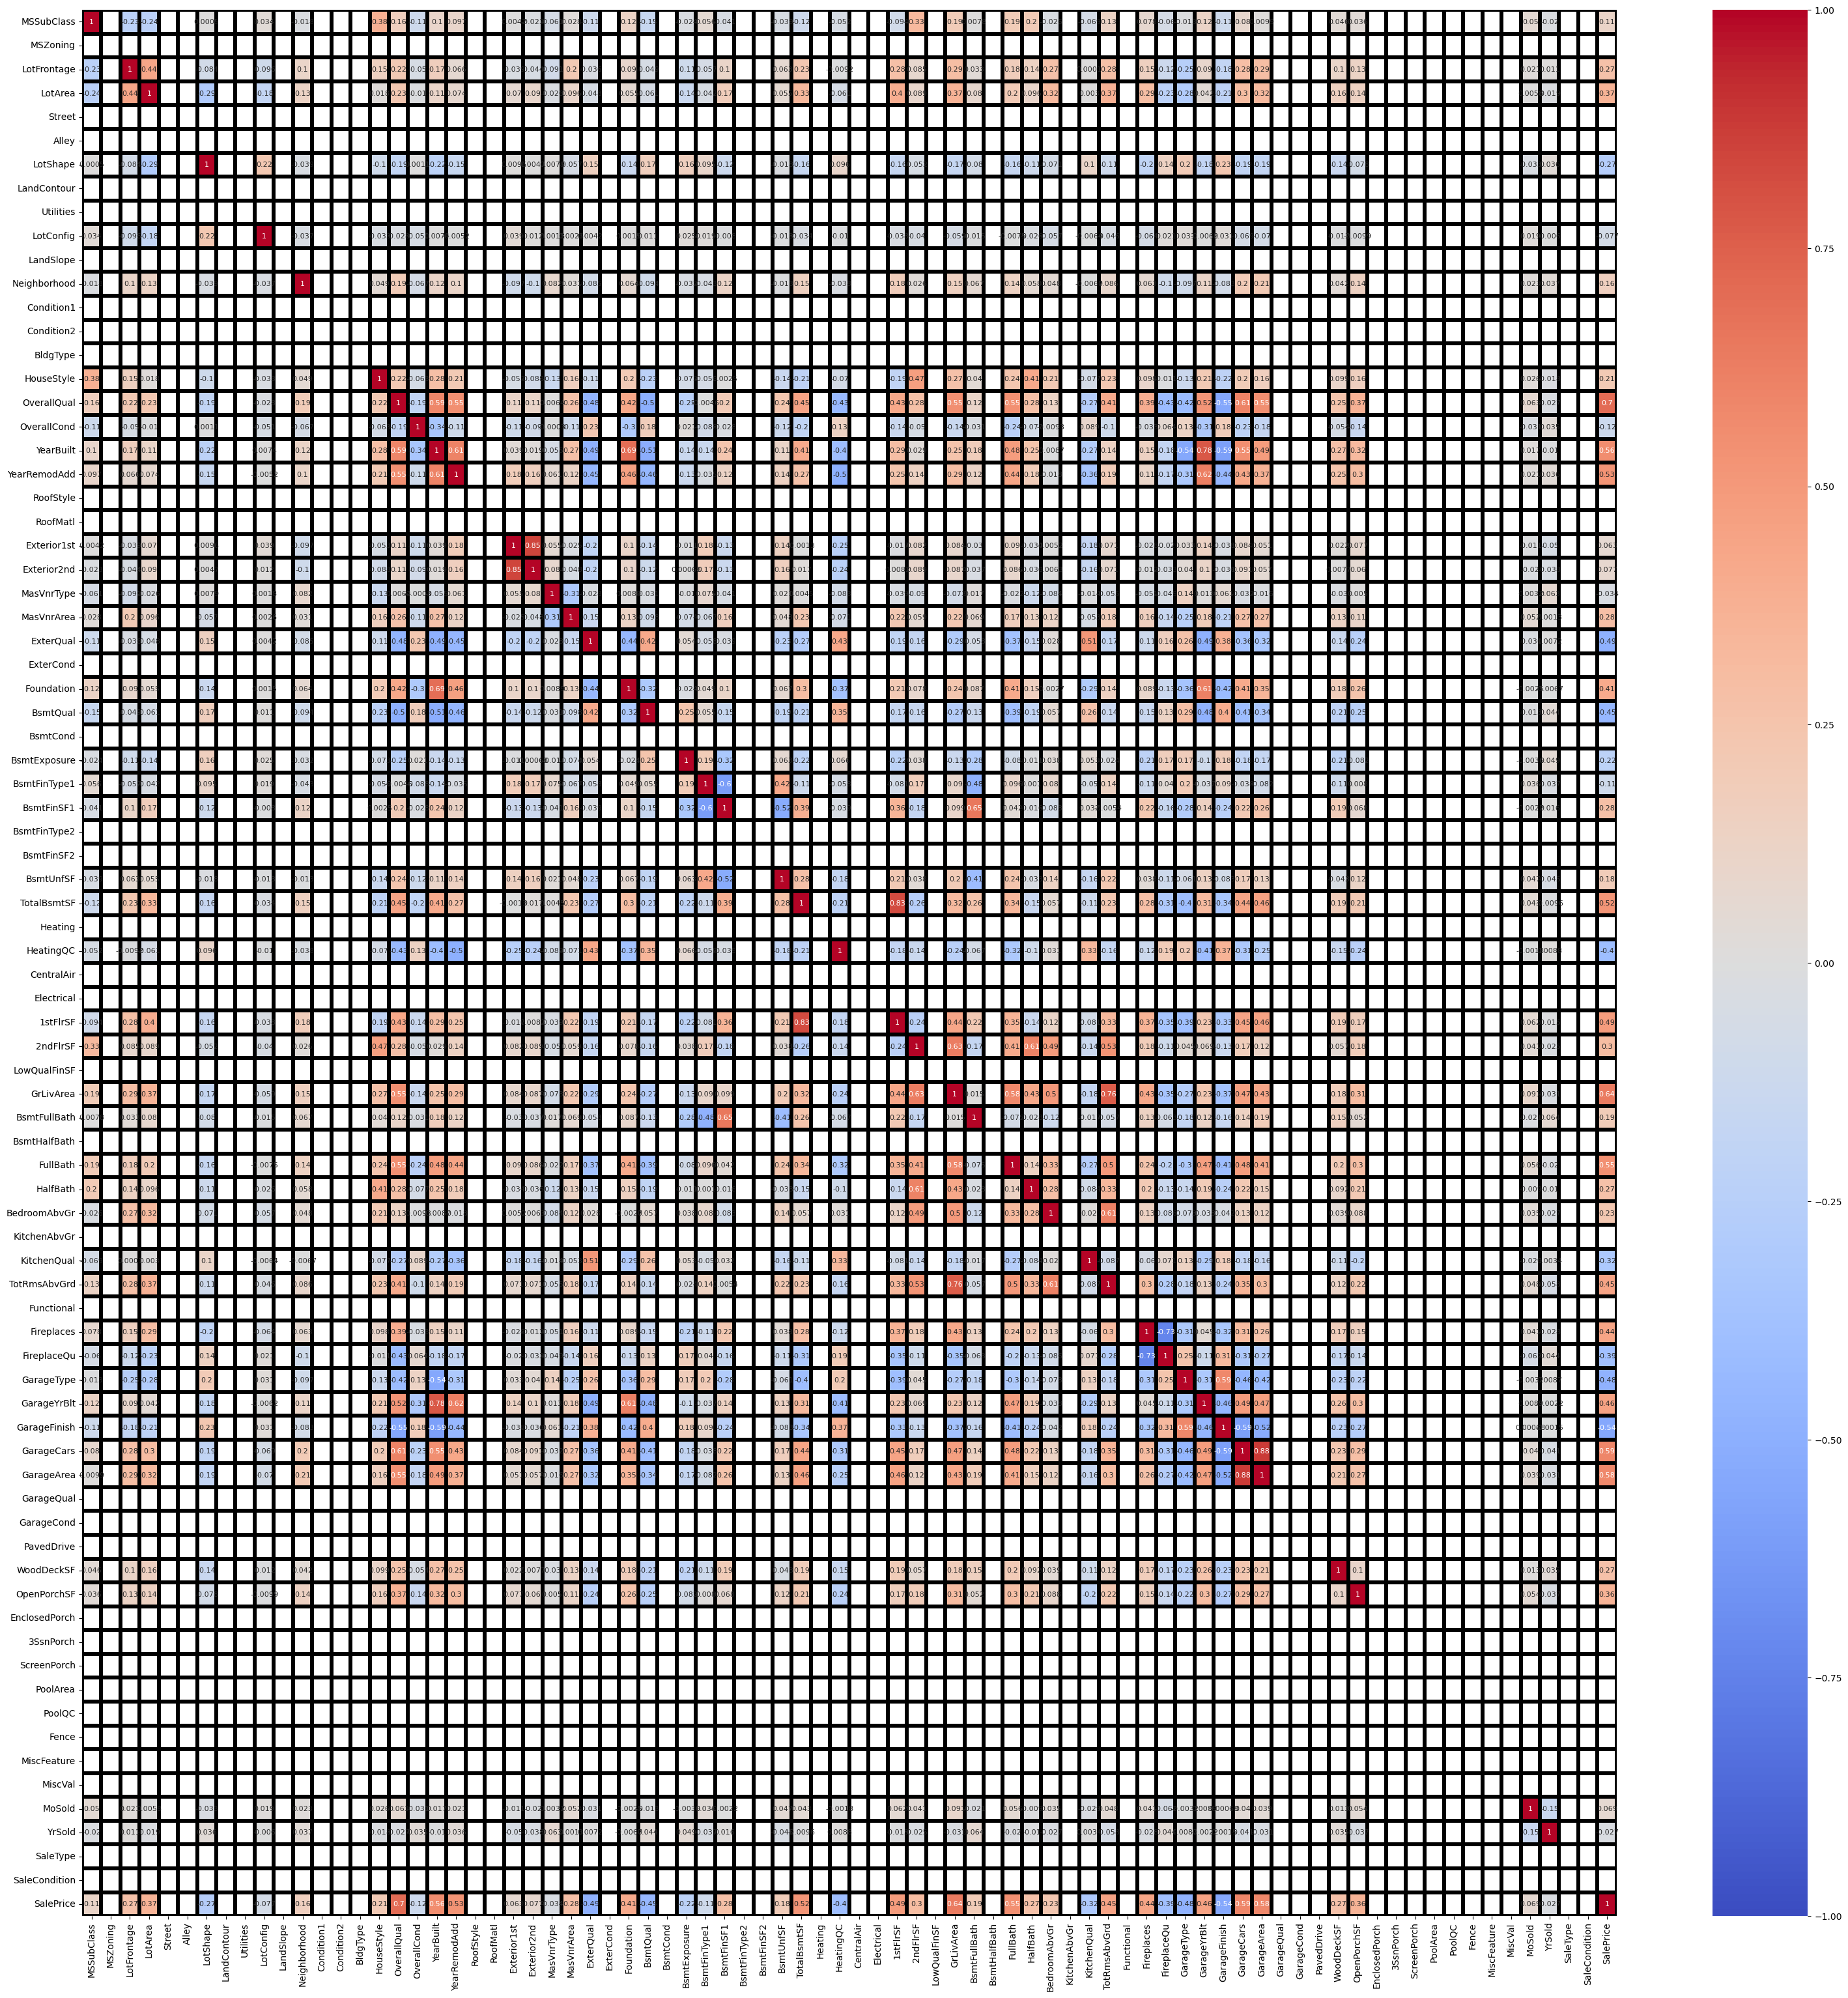

In [130]:
# Check for correlation between features
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(38,38))
corr = data_clean.corr()
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', annot_kws={"fontsize":8})
plt.show()

<Axes: >

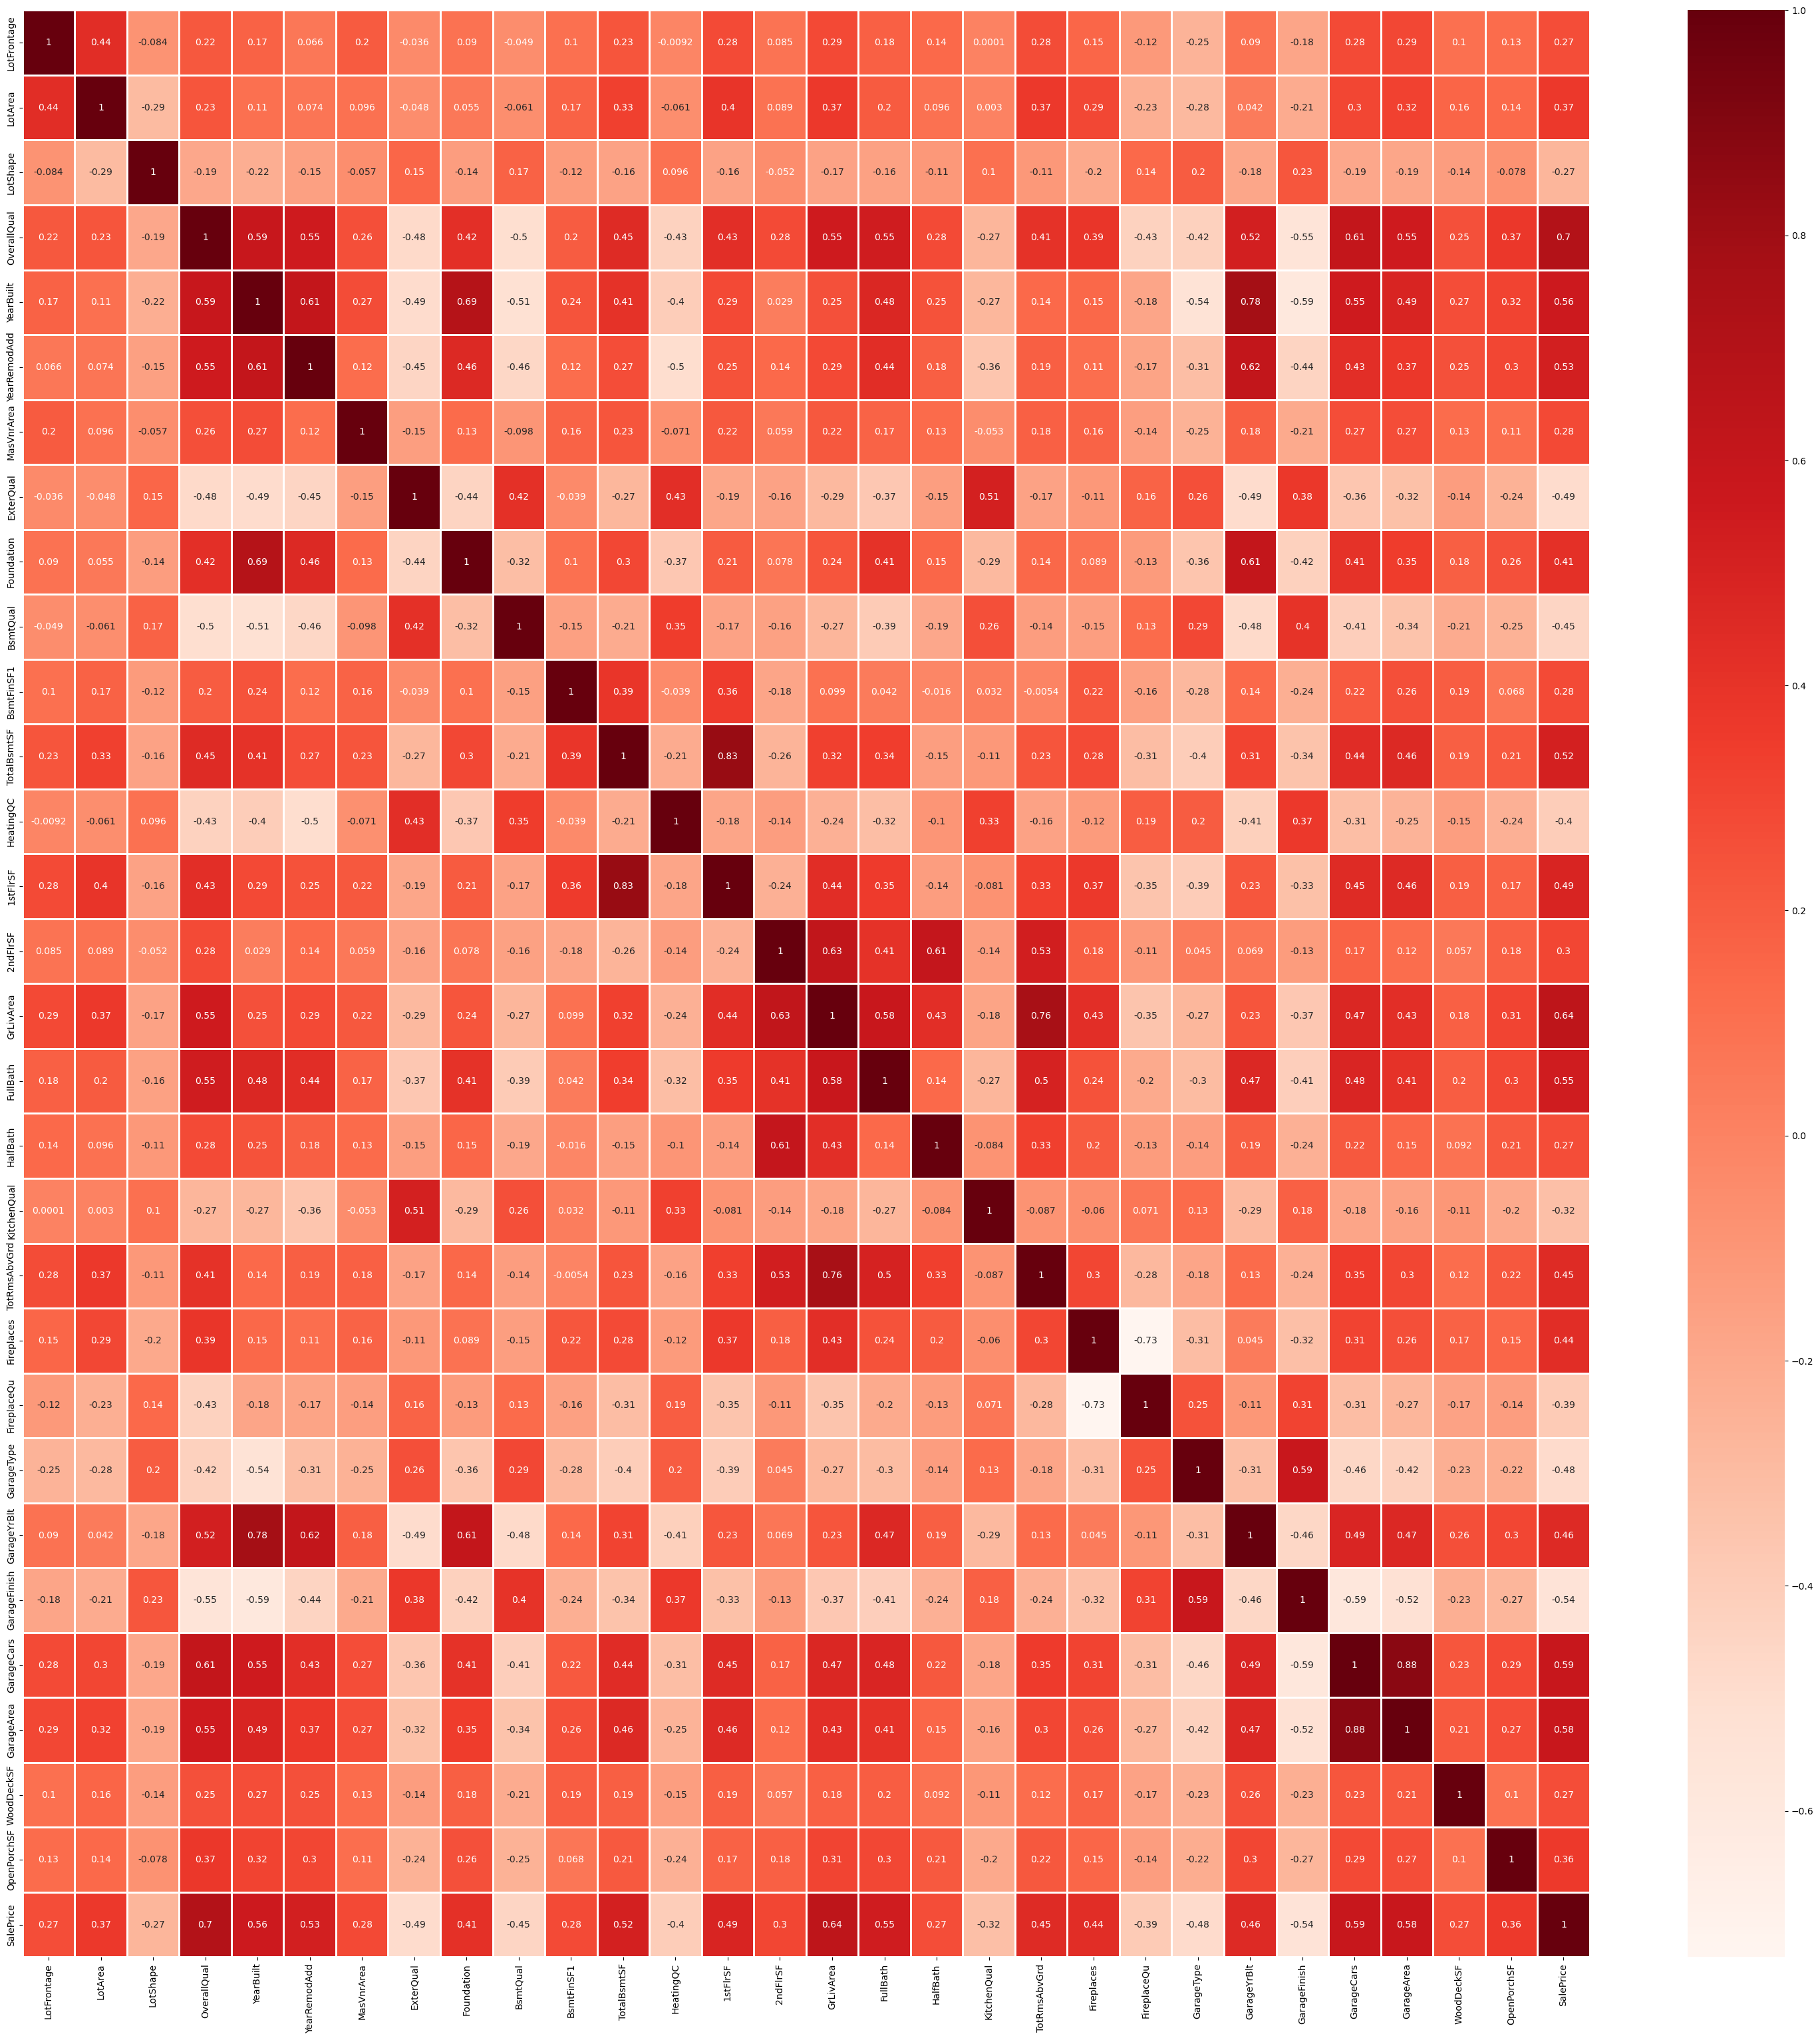

In [131]:
# Check for high correlation between features
fig, ax = plt.subplots(figsize=(38,38))
high_corr = corr.index[abs(corr['SalePrice'])>0.25]
sns.heatmap(data_clean[high_corr].corr(),annot=True,linewidth=2,cmap='Reds',)

<Axes: >

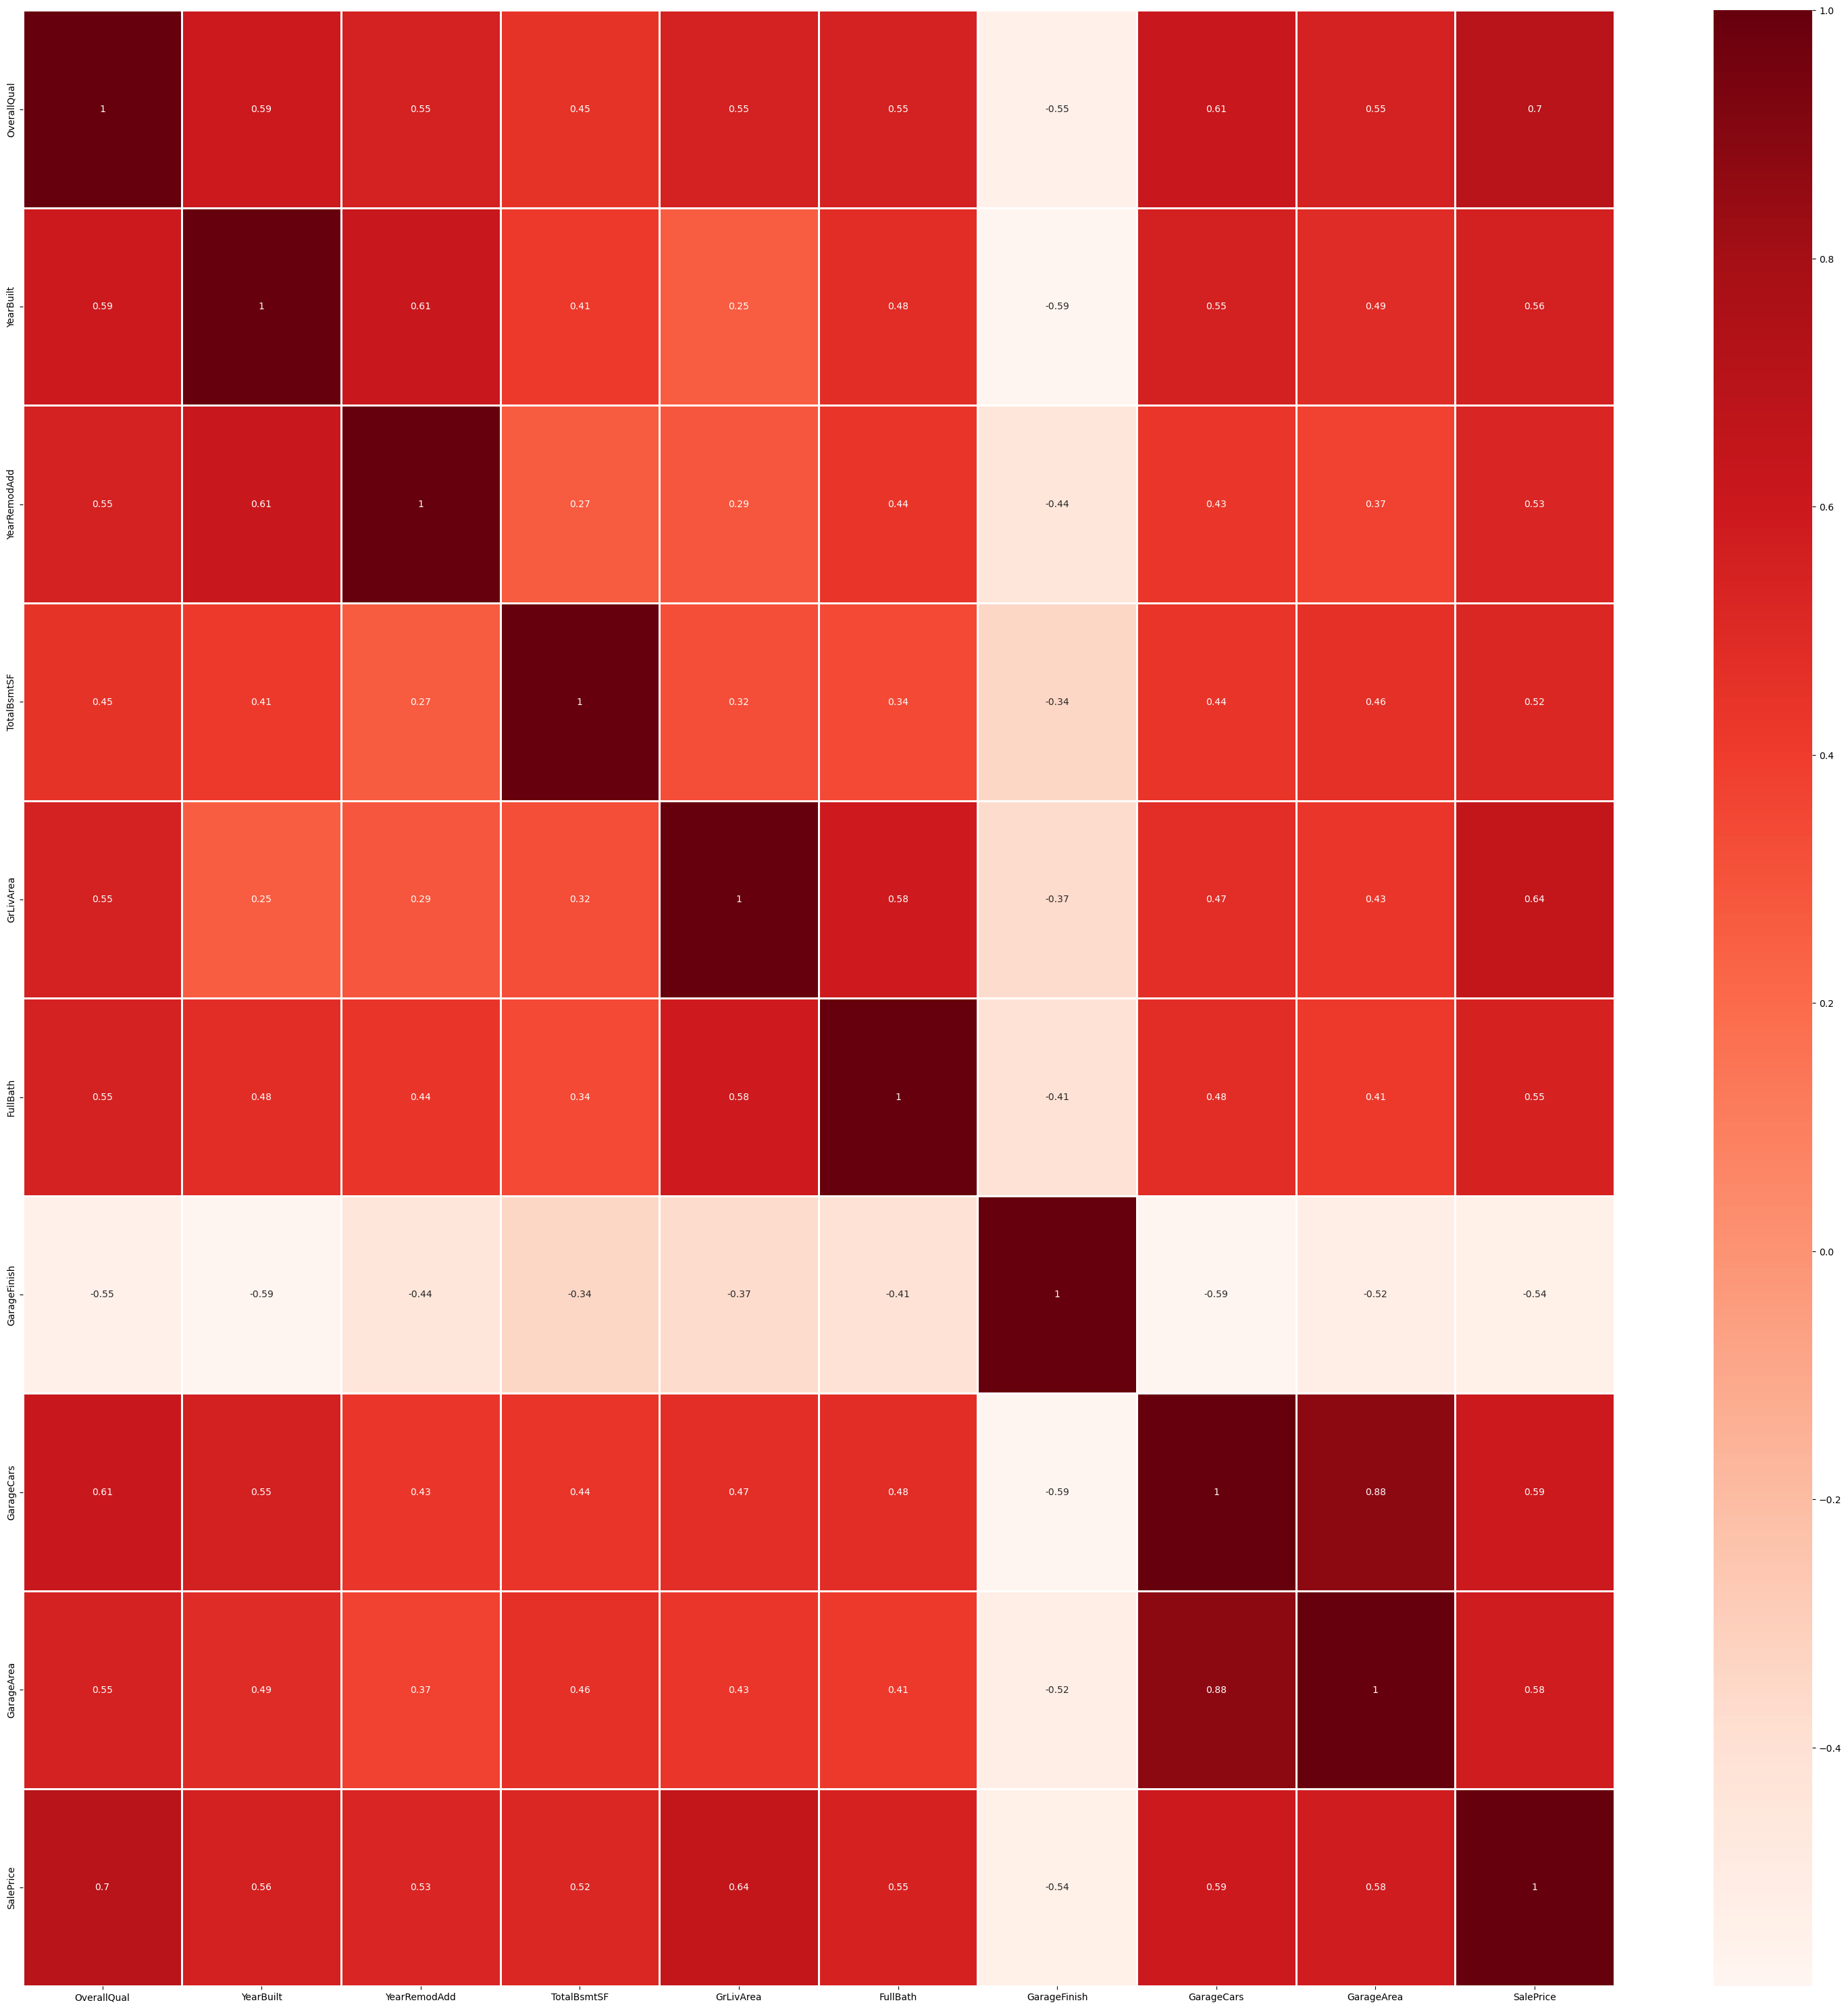

In [132]:
# Check for higher correlation between features
fig, ax = plt.subplots(figsize=(38,38))
high_corr = corr.index[abs(corr['SalePrice'])>0.5]
sns.heatmap(data_clean[high_corr].corr(),annot=True,linewidth=2,cmap='Reds',)

<Axes: xlabel='SalePrice', ylabel='Count'>

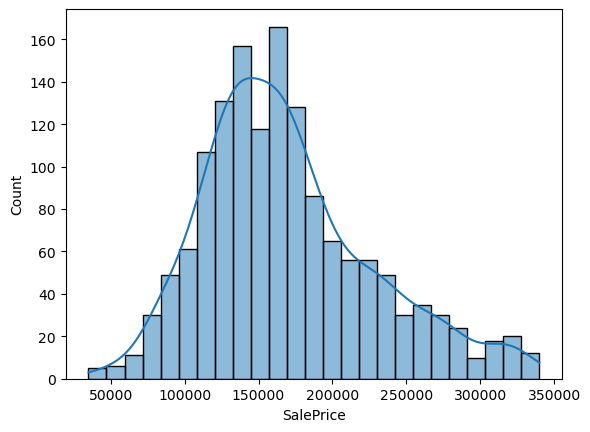

In [134]:
# Check the prices curve
sns.histplot(data_clean['SalePrice'], kde=True)